In [ ]:
#After reorganizing the directories some cells could lead to wrong directory path.

In [1]:
import math
import numpy as np
import subprocess
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special

In [2]:
lattice = [3, 4, 5, 8, 10, 15, 20]
Npoints = [500, 1000, 1500, 2000, 2500]
Npoints[1]
LL = len(lattice)

In [3]:
temp_data = np.zeros((Npoints[1], Npoints[1]))
grid = np.zeros((LL, Npoints[1]))
num_eigen = np.zeros((LL, Npoints[1]))
num_vec = np.zeros((LL, Npoints[1], Npoints[1]))

for ii, range in enumerate(lattice):
    output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {}".format(-range, range, Npoints[1]), 
                    stdout=subprocess.PIPE, encoding="utf-8")
    
    temp_data = np.genfromtxt("./EigenVectors.txt", delimiter=",", comments="#") #usecols=range(1000)
    grid[ii, :] = temp_data[0, :]
    num_vec[ii, :, :] = temp_data[1:, :] #Numerical Eigenvectors.
    num_eigen[ii] = np.genfromtxt("./EigenValues.txt", delimiter=",", comments="#")    

 

In [4]:
#grid values (import from program.)
xmin = grid[0]
xmax = grid[-1]
NN = len(grid[0])
NN_s = min(150, NN) #variable to study system. 149 is due to hermite polynomials. After that overflow issue.

Narray = np.arange(0, NN, 1)
ana_eigen = 2* Narray + 1  #Theoretical Eigenvalues.

In [5]:
hermitepol = np.zeros((LL, NN_s, len(grid[0])))
norm_h = np.zeros((LL, NN_s, len(grid[0])))
arr200 = np.arange(0, NN_s, 1)

for jj, arange in enumerate(lattice):
    for ii in arr200:        #Defining normalized Hermite polynomals
        hermitepol[jj, ii, :] = math.e**(-(grid[jj, :]**2)/2) * special.hermite(ii, monic=False)(grid[jj, :]) #1/math.sqrt(2**ii * math.factorial(ii)) * math.pi**(1/4) *
        if ii > 1 :
            hermitepol[jj, ii, :] = - hermitepol[jj, ii, :]
        norm_h[jj, ii, :] = hermitepol[jj, ii, :] / np.linalg.norm(hermitepol[jj, ii, :])

/usr/local/lib/python3.10/site-packages/scipy/special/_orthogonal.py:121: RuntimeWarning: invalid value encountered in sqrt
  mu = sqrt(hn)


In [6]:
max_diff = np.zeros((LL, NN_s))
max_index = np.zeros((LL, NN_s))
diff_an = np.zeros([LL, NN_s, len(grid[0])])
diff_an[:, :, :] = norm_h - num_vec[:, :NN_s]


for jj, range in enumerate(lattice):
    for ii in arr200:
        max_diff[jj, ii] = np.amax(np.absolute(diff_an[jj, ii, :]))
        max_index[jj, ii] = np.argmax(np.absolute(diff_an[jj, ii, :]))

#print("min diff = ", np.amin(max_diff), "max diff = ", np.amax(max_diff))
#print("min index = ", np.amin(max_index), "max index = ", np.amax(max_index))

#print(max(abs(norm_h[2]  - num_vec[2])))
#print(diff_an)

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/41742499.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray), np.log(num_eigen[jj]), marker='P', label = f'Num. Eigenvalues. Range: {[-range, range]}', alpha = 0.5) #'#002FD0'
/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/41742499.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray), np.log(ana_eigen), 'c', marker='', label = 'Analytical Eigenvalues')


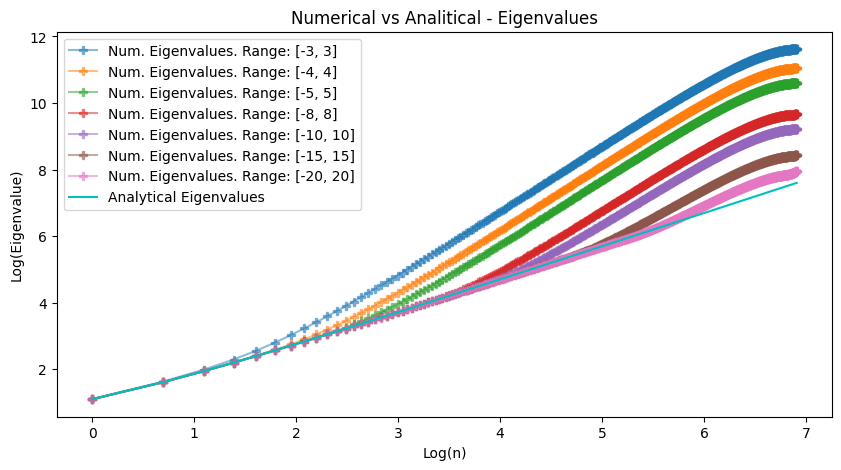

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel("Log(n)")
plt.ylabel("Log(Eigenvalue)")
plt.title("Numerical vs Analitical - Eigenvalues")

for jj, range in enumerate(lattice):
    plt.plot(np.log(Narray), np.log(num_eigen[jj]), marker='P', label = f'Num. Eigenvalues. Range: {[-range, range]}', alpha = 0.5) #'#002FD0'
    #plt.plot(Narray, num_eigen[jj], 'b', marker='P', label = f'Numerical Eigenvalues: {[-range, range]}', alpha = 0.5) #'#002FD0'
plt.plot(np.log(Narray), np.log(ana_eigen), 'c', marker='', label = 'Analytical Eigenvalues')

plt.legend()
plt.savefig('./Plots/num.vs.ana-eigvalue_RANGE.png')
plt.show()

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/3919010523.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray), np.log(np.abs(num_eigen[jj] - ana_eigen)), marker='P', label = f'Range: {[-range, range]}', alpha = 0.5) #'#002FD0'


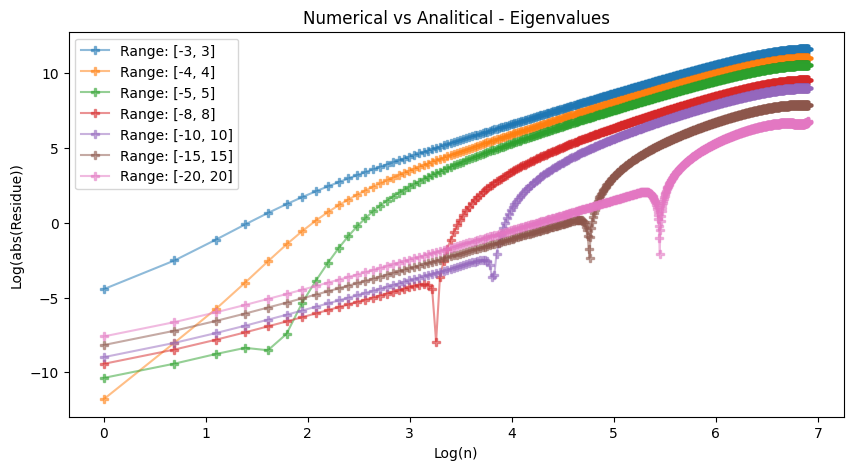

In [8]:
plt.figure(figsize=(10,5))
plt.xlabel("Log(n)")
plt.ylabel("Log(abs(Residue))")
plt.title("Numerical vs Analitical - Eigenvalues")

for jj, range in enumerate(lattice):
    plt.plot(np.log(Narray), np.log(np.abs(num_eigen[jj] - ana_eigen)), marker='P', label = f'Range: {[-range, range]}', alpha = 0.5) #'#002FD0'


plt.legend()
plt.savefig('./Plots/err_eigval_RANGE.png')
plt.show()

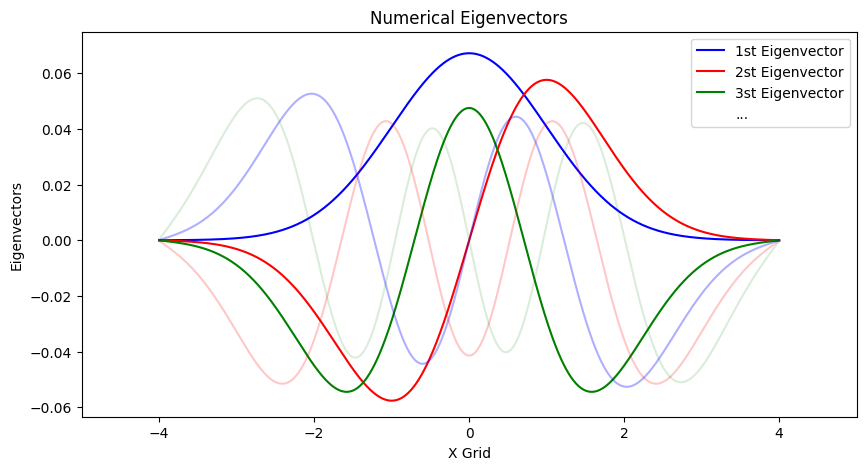

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel("X Grid")
plt.ylabel("Eigenvectors")
plt.title("Numerical Eigenvectors")

plt.plot(grid[1], num_vec[1, 0, :], 'b', marker='', label = f'1st Eigenvector') #'#002FD0'
plt.plot(grid[1], num_vec[1, 1, :], 'r', marker='', label = f'2st Eigenvector') #'#3361FF' 
plt.plot(grid[1], num_vec[1, 2, :], 'g', marker='', label = f'3st Eigenvector') #'#02A7EE'

plt.plot(grid[1], num_vec[1, 3, :], 'b', marker='', alpha = 2**(-(3/1.8))) #, label = f'1st Eigenvector')
plt.plot(grid[1], num_vec[1, 4, :], 'r', marker='', alpha = 2**(-(3+1)/1.8))   
plt.plot(grid[1], num_vec[1, 5, :], 'g', marker='', alpha = 2**(-(3+2)/1.8))
plt.plot([], [], ' ', label=(f"..."))

plt.ylim([1.1 * np.min(num_vec[1, 1, :]), 1.3 * np.max(num_vec[1, 1, :])])
plt.xlim([-5, 5])

plt.legend()
plt.savefig('./Plots/Numerical-Eigenvectors.png')
plt.show()

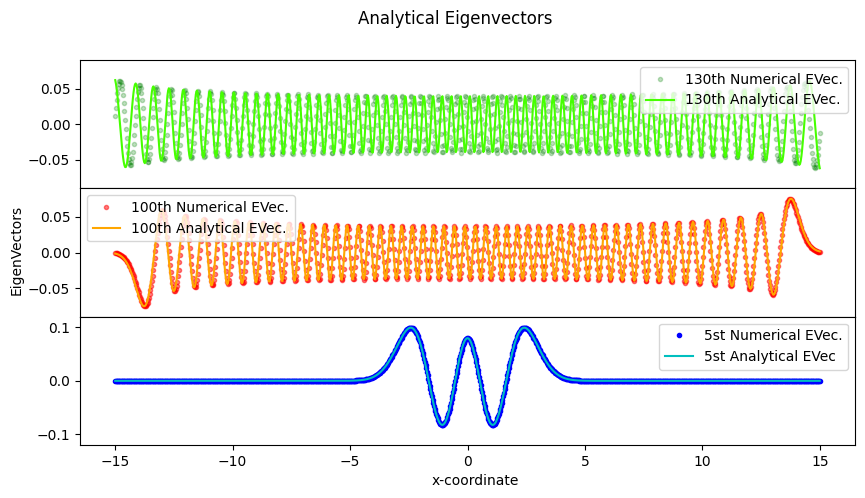

In [10]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("Analytical Eigenvectors")

a, b, c = 4, 99, 129

gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=False, sharey=False)

axs[2].plot(grid[5], num_vec[5, a,   :], 'b', marker='.', label = f'{a+1}st Numerical EVec.', linestyle = 'None')
axs[2].plot(grid[5], -norm_h[5, a,   :], 'c', marker='', label = f'{a+1}st Analytical EVec')

axs[1].plot(grid[5], num_vec[5, b,   :], 'r', marker='.', label = f'{b+1}th Numerical EVec.', linestyle = 'None', alpha = 0.5)  
axs[1].plot(grid[5], -norm_h[5, b, :], '#FFA600', marker='', label = f'{b+1}th Analytical EVec.') 

axs[0].plot(grid[5], num_vec[5, c,   :], 'g', marker='.', label = f'{c+1}th Numerical EVec.', linestyle = 'None', alpha = 0.25)  
axs[0].plot(grid[5], -norm_h[5, c, :], '#46FF00', marker='', label = f'{c+1}th Analytical EVec.') 
#plt.ylim([1.5 * np.min(hermitepol[1,:]), 1.5 * np.max(hermitepol[1,:])])

axs[0].set_ylim([-.09, .09])
axs[1].set_ylim([-.09, .09])
axs[2].set_ylim([-.12, .12])

axs[0].legend(loc= 'best')
axs[1].legend()
axs[2].legend()

fig.text(0.52, 0.03, 'x-coordinate', ha='center')
fig.text(0.055, 0.5, 'EigenVectors', va='center', rotation='vertical')

plt.legend()
plt.savefig('./Plots/Analitical-Eigenvectors.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


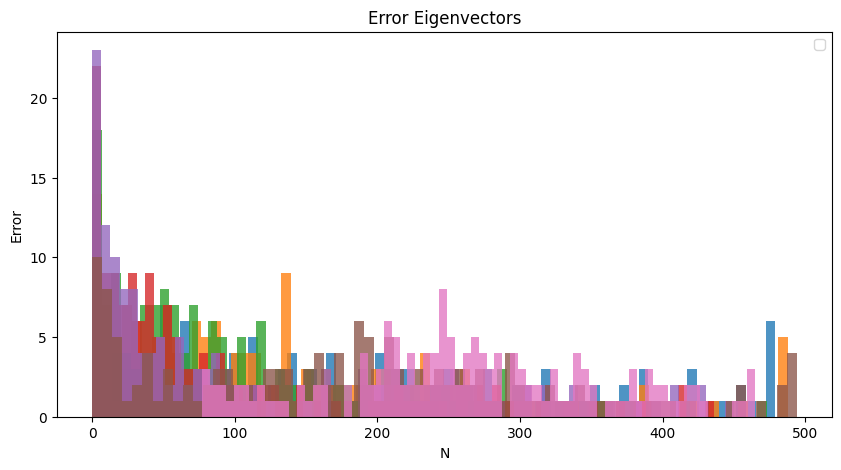

In [11]:

plt.figure(figsize=(10,5))
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error Eigenvectors")
bord_index = max_index
for jj, range in enumerate(lattice):
    for ii in arr200:
        if (max_index[jj, ii] > NN/2):
            bord_index[jj, ii] = NN - max_index[jj, ii]

for jj, range in enumerate(lattice):            
    n, bins, patches = plt.hist(bord_index[jj], 70, density=False, alpha=0.79)


plt.legend()
plt.savefig('./Plots/Hist-index_NO.png')
plt.show()

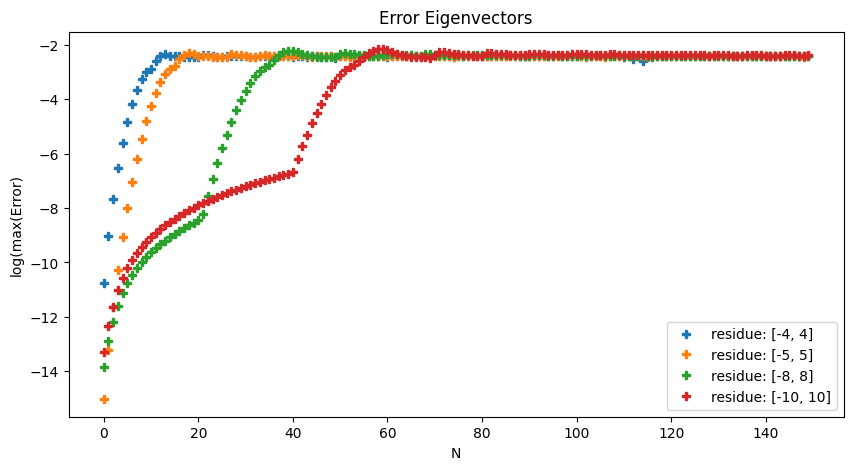

In [12]:

plt.figure(figsize=(10,5))
plt.xlabel("N")
plt.ylabel("log(max(Error)")
plt.title("Error Eigenvectors")

for jj, range in enumerate(lattice): 
  if jj == 1 or jj == 2 or jj == 4 or jj == 3 :
    plt.plot(arr200 , np.log(max_diff[jj]), marker='P', label = f'residue: [-{range}, {range}]', linestyle='None')
  #  plt.plot(data[0,:], hermitepol[ii+1, :]  - data[ii+2,:], 'r', marker='', alpha = 2**(-(ii+1)/1.8))   
  #  plt.plot(data[0,:], hermitepol[ii+2, :]  - data[ii+3,:], 'g', marker='', alpha = 2**(-(ii+2)/1.8))

plt.legend()
plt.savefig('./Plots/max_err_eigenvec_RANGE.png')
plt.show()

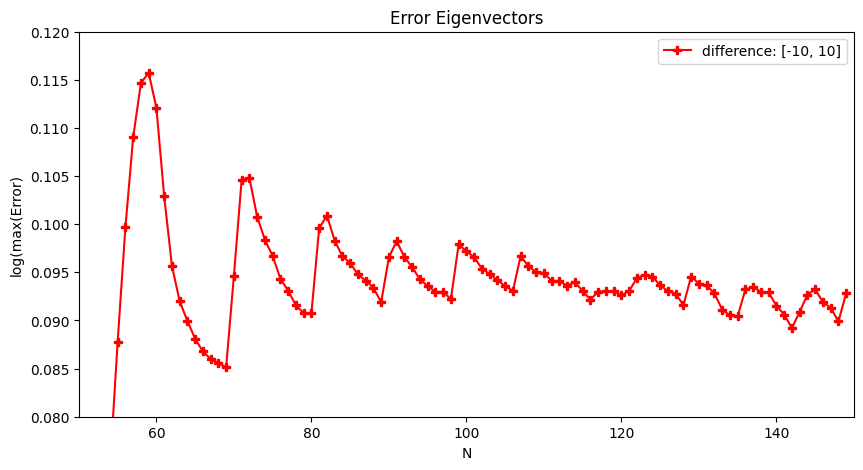

In [13]:
plt.figure(figsize=(10,5))
plt.xlabel("N")
plt.ylabel("log(max(Error)")
plt.title("Error Eigenvectors")

plt.plot(arr200 , max_diff[4], 'r',  marker='P' , label = f'difference: [-{10}, {10}]')
  #  plt.plot(data[0,:], hermitepol[ii+1, :]  - data[ii+2,:], 'r', marker='', alpha = 2**(-(ii+1)/1.8))   
  #  plt.plot(data[0,:], hermitepol[ii+2, :]  - data[ii+3,:], 'g', marker='', alpha = 2**(-(ii+2)/1.8))

plt.ylim([0.08, 0.12])
plt.xlim([50, 150])

plt.legend()
plt.savefig('./Plots/max_err_ZOOM_RANGE.png')
plt.show()

In [14]:
grid_0 = np.zeros(Npoints[0]) 
num_eigen_0 = np.zeros(Npoints[0])
num_vec_0 = np.zeros((Npoints[0], Npoints[0]))

grid_1 = np.zeros(Npoints[1]) 
num_eigen_1 = np.zeros(Npoints[1])
num_vec_1 = np.zeros((Npoints[1], Npoints[1]))

grid_2 = np.zeros(Npoints[2]) 
num_eigen_2 = np.zeros(Npoints[2])
num_vec_2 = np.zeros((Npoints[2], Npoints[2]))

grid_3 = np.zeros(Npoints[3]) 
num_eigen_3 = np.zeros(Npoints[3])
num_vec_3 = np.zeros((Npoints[3], Npoints[3]))

grid_4 = np.zeros(Npoints[4]) 
num_eigen_4 = np.zeros(Npoints[4])
num_vec_4 = np.zeros((Npoints[4], Npoints[4]))


output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {}".format(-10, 10, Npoints[0]), 
                    stdout=subprocess.PIPE, encoding="utf-8")
    
temp_data = np.genfromtxt("./EigenVectors.txt", delimiter=",", comments="#") #usecols=range(1000)
grid_0[:] = temp_data[0, :]
num_vec_0[:, :] = temp_data[1:, :] #Numerical Eigenvectors.
num_eigen_0[:] = np.genfromtxt("./EigenValues.txt", delimiter=",", comments="#")    


output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {}".format(-10, 10, Npoints[1]), 
                    stdout=subprocess.PIPE, encoding="utf-8")
    
temp_data1 = np.genfromtxt("./EigenVectors.txt", delimiter=",", comments="#") #usecols=range(1000)
grid_1[:] = temp_data1[0, :]
num_vec_1[:, :] = temp_data1[1:, :] #Numerical Eigenvectors.
num_eigen_1[:] = np.genfromtxt("./EigenValues.txt", delimiter=",", comments="#")    


output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {}".format(-10, 10, Npoints[2]), 
                    stdout=subprocess.PIPE, encoding="utf-8")
    
temp_data2 = np.genfromtxt("./EigenVectors.txt", delimiter=",", comments="#") #usecols=range(1000)
grid_2[:] = temp_data2[0, :]
num_vec_2[:, :] = temp_data2[1:, :] #Numerical Eigenvectors.
num_eigen_2[:] = np.genfromtxt("./EigenValues.txt", delimiter=",", comments="#")    


output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {}".format(-10, 10, Npoints[3]), 
                    stdout=subprocess.PIPE, encoding="utf-8")
    
temp_data3 = np.genfromtxt("./EigenVectors.txt", delimiter=",", comments="#") #usecols=range(1000)
grid_3[:] = temp_data3[0, :]
num_vec_3[:, :] = temp_data3[1:, :] #Numerical Eigenvectors.
num_eigen_3[:] = np.genfromtxt("./EigenValues.txt", delimiter=",", comments="#")    


output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {}".format(-10, 10, Npoints[4]), 
                    stdout=subprocess.PIPE, encoding="utf-8")
    
temp_data4 = np.genfromtxt("./EigenVectors.txt", delimiter=",", comments="#") #usecols=range(1000)
grid_4[:] = temp_data4[0, :]
num_vec_4[:, :] = temp_data4[1:, :] #Numerical Eigenvectors.
num_eigen_4[:] = np.genfromtxt("./EigenValues.txt", delimiter=",", comments="#")    


In [15]:
xmin0 = grid_0[0]
xmax0 = grid_0[-1]
NN0 = len(grid_0[:])
NN_s = min(150, NN) #variable to study system. 149 is due to hermite polynomials. After that overflow issue.

Narray0 = np.arange(0, NN0, 1)
ana_eigen0 = 2* Narray0 + 1  #Theoretical Eigenvalues.

xmin1 = grid_1[0]
xmax1 = grid_1[-1]
NN1 = len(grid_1[:])

Narray1 = np.arange(0, NN1, 1)
ana_eigen1 = 2* Narray1 + 1  #Theoretical Eigenvalues.

xmin2 = grid_2[0]
xmax2 = grid_2[-1]
NN2 = len(grid_2[:])

Narray2 = np.arange(0, NN2, 1)
ana_eigen2 = 2* Narray2 + 1  #Theoretical Eigenvalues.

xmin3 = grid_3[0]
xmax3 = grid_3[-1]
NN3 = len(grid_3[:])

Narray3 = np.arange(0, NN3, 1)
ana_eigen3 = 2* Narray3 + 1  #Theoretical Eigenvalues.

xmin4 = grid_4[0]
xmax4 = grid_4[-1]
NN4 = len(grid_4[:])

Narray4 = np.arange(0, NN4, 1)
ana_eigen4 = 2* Narray4 + 1  #Theoretical Eigenvalues.

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/1217542892.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray4), np.log(num_eigen_4), marker='+', label = f'Num. Eigenvalues. N: {500}', alpha = 0.2) #'#002FD0'
/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/1217542892.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray3), np.log(num_eigen_3), marker='+', label = f'Num. Eigenvalues. N: {500}', alpha = 0.3) #'#002FD0'
/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/1217542892.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray2), np.log(num_eigen_2), marker='+', label = f'Num. Eigenvalues. N: {1500}', alpha = 0.4) #'#002FD0'
/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/1217542892.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray1), np.log(num_eigen_1), marker='+', label = f'Num. Eigenvalues. N: {1000}

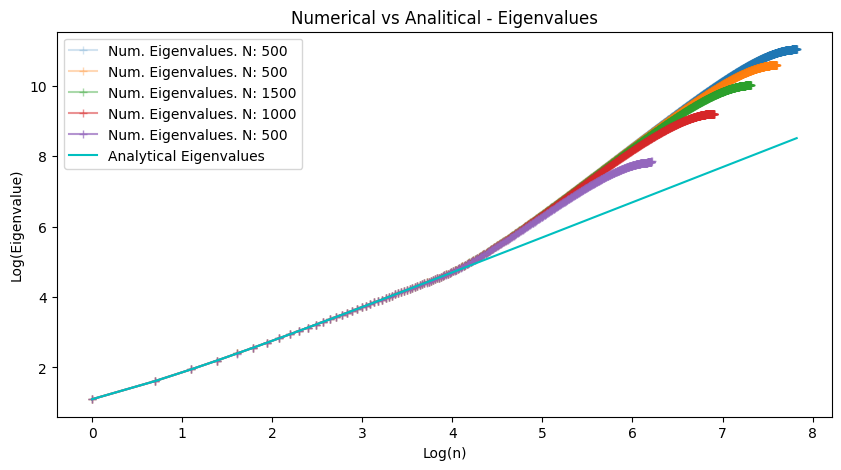

In [16]:
plt.figure(figsize=(10,5))
plt.xlabel("Log(n)")
plt.ylabel("Log(Eigenvalue)")
plt.title("Numerical vs Analitical - Eigenvalues")


plt.plot(np.log(Narray4), np.log(num_eigen_4), marker='+', label = f'Num. Eigenvalues. N: {500}', alpha = 0.2) #'#002FD0'
plt.plot(np.log(Narray3), np.log(num_eigen_3), marker='+', label = f'Num. Eigenvalues. N: {500}', alpha = 0.3) #'#002FD0'
plt.plot(np.log(Narray2), np.log(num_eigen_2), marker='+', label = f'Num. Eigenvalues. N: {1500}', alpha = 0.4) #'#002FD0'
plt.plot(np.log(Narray1), np.log(num_eigen_1), marker='+', label = f'Num. Eigenvalues. N: {1000}', alpha = 0.5) #'#002FD0'
plt.plot(np.log(Narray0), np.log(num_eigen_0), marker='+', label = f'Num. Eigenvalues. N: {500}', alpha = 0.7) #'#002FD0'






    #plt.plot(Narray, num_eigen[jj], 'b', marker='P', label = f'Numerical Eigenvalues: {[-range, range]}', alpha = 0.5) #'#002FD0'
plt.plot(np.log(Narray4), np.log(ana_eigen4), 'c', marker='', label = 'Analytical Eigenvalues')

plt.legend()
plt.savefig('./Plots/n.vs.a_eigvalue-POINTS.png')
plt.show()

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/2624448912.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray4), np.log(np.abs(num_eigen_4 - ana_eigen4[:len(num_eigen_4)])), marker='P', label = f'N = {Npoints[4]}', alpha = 0.5)
/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/2624448912.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray3), np.log(np.abs(num_eigen_3 - ana_eigen4[:len(num_eigen_3)])), marker='P', label = f'N = {Npoints[3]}', alpha = 0.5)
/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/2624448912.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray2), np.log(np.abs(num_eigen_2 - ana_eigen4[:len(num_eigen_2)])), marker='P', label = f'N = {Npoints[2]}', alpha = 0.5)
/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_59074/2624448912.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Narray1), np.log(np.abs(n

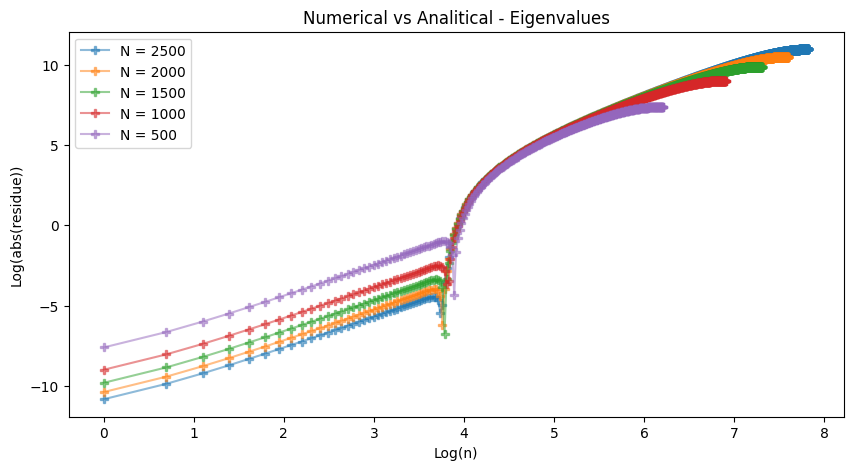

In [17]:
plt.figure(figsize=(10,5))
plt.xlabel("Log(n)")
plt.ylabel("Log(abs(residue))")
plt.title("Numerical vs Analitical - Eigenvalues")

plt.plot(np.log(Narray4), np.log(np.abs(num_eigen_4 - ana_eigen4[:len(num_eigen_4)])), marker='P', label = f'N = {Npoints[4]}', alpha = 0.5)
plt.plot(np.log(Narray3), np.log(np.abs(num_eigen_3 - ana_eigen4[:len(num_eigen_3)])), marker='P', label = f'N = {Npoints[3]}', alpha = 0.5)
plt.plot(np.log(Narray2), np.log(np.abs(num_eigen_2 - ana_eigen4[:len(num_eigen_2)])), marker='P', label = f'N = {Npoints[2]}', alpha = 0.5)
plt.plot(np.log(Narray1), np.log(np.abs(num_eigen_1 - ana_eigen4[:len(num_eigen_1)])), marker='P', label = f'N = {Npoints[1]}', alpha = 0.5) #'#002FD0'
plt.plot(np.log(Narray0), np.log(np.abs(num_eigen_0 - ana_eigen4[:len(num_eigen_0)])), marker='P', label = f'N = {Npoints[0]}', alpha = 0.5)

plt.legend()
plt.savefig('./Plots/err_eigval_POINTS.png')
plt.show()

In [18]:
hermitepol0 = np.zeros((NN_s, len(grid_0[:])))
hermitepol1 = np.zeros((NN_s, len(grid_1[:])))
hermitepol2 = np.zeros((NN_s, len(grid_2[:])))
hermitepol3 = np.zeros((NN_s, len(grid_3[:])))
hermitepol4 = np.zeros((NN_s, len(grid_4[:])))

norm_h0 = np.zeros((NN_s, len(grid_0[:])))
norm_h1 = np.zeros((NN_s, len(grid_1[:])))
norm_h2 = np.zeros((NN_s, len(grid_2[:])))
norm_h3 = np.zeros((NN_s, len(grid_3[:])))
norm_h4 = np.zeros((NN_s, len(grid_4[:])))

arr200 = np.arange(0, NN_s, 1)

for ii in arr200:        #Defining normalized Hermite polynomals
    hermitepol0[ii, :] = math.e**(-(grid_0[:]**2)/2) * special.hermite(ii, monic=False)(grid_0[:])
    hermitepol1[ii, :] = math.e**(-(grid_1[:]**2)/2) * special.hermite(ii, monic=False)(grid_1[:])  #1/math.sqrt(2**ii * math.factorial(ii)) * math.pi**(1/4) *
    hermitepol2[ii, :] = math.e**(-(grid_2[:]**2)/2) * special.hermite(ii, monic=False)(grid_2[:]) 
    hermitepol3[ii, :] = math.e**(-(grid_3[:]**2)/2) * special.hermite(ii, monic=False)(grid_3[:]) 
    hermitepol4[ii, :] = math.e**(-(grid_4[:]**2)/2) * special.hermite(ii, monic=False)(grid_4[:]) 
    if ii > 1 :
        hermitepol0[ii, :] = - hermitepol0[ii, :]
        hermitepol1[ii, :] = - hermitepol1[ii, :]
        hermitepol2[ii, :] = - hermitepol2[ii, :]
        hermitepol3[ii, :] = - hermitepol3[ii, :]
        hermitepol4[ii, :] = - hermitepol4[ii, :]

    norm_h0[ii, :] = hermitepol0[ii, :] / np.linalg.norm(hermitepol0[ii, :])
    norm_h1[ii, :] = hermitepol1[ii, :] / np.linalg.norm(hermitepol1[ii, :])
    norm_h2[ii, :] = hermitepol2[ii, :] / np.linalg.norm(hermitepol2[ii, :])
    norm_h3[ii, :] = hermitepol3[ii, :] / np.linalg.norm(hermitepol3[ii, :])
    norm_h4[ii, :] = hermitepol4[ii, :] / np.linalg.norm(hermitepol4[ii, :])


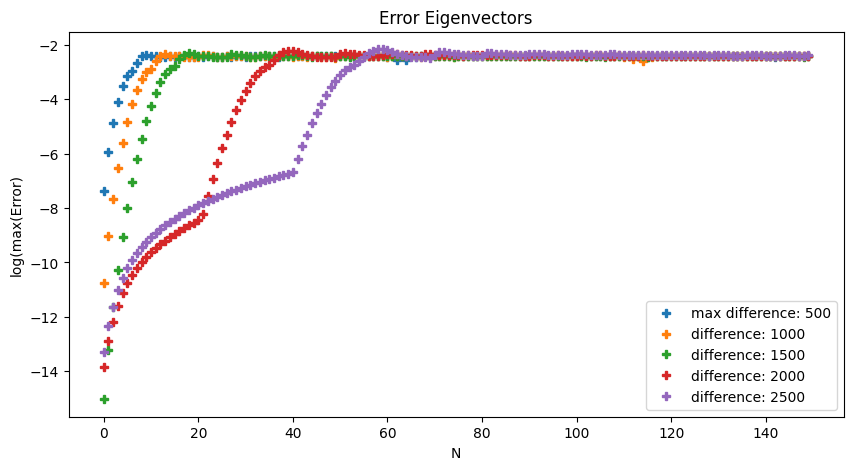

In [19]:
plt.figure(figsize=(10,5))
plt.xlabel("N")
plt.ylabel("log(max(Error)")
plt.title("Error Eigenvectors")

plt.plot(arr200 , np.log(max_diff[0]), marker='P', label = f'max difference: {Npoints[0]}', linestyle='None')
plt.plot(arr200 , np.log(max_diff[1]), marker='P', label = f'difference: {Npoints[1]}', linestyle='None')
plt.plot(arr200 , np.log(max_diff[2]), marker='P', label = f'difference: {Npoints[2]}', linestyle='None')
plt.plot(arr200 , np.log(max_diff[3]), marker='P', label = f'difference: {Npoints[3]}', linestyle='None')
plt.plot(arr200 , np.log(max_diff[4]), marker='P', label = f'difference: {Npoints[4]}', linestyle='None')


plt.legend()
plt.savefig('./Plots/max_err_eigenvec_POINTS.png')
plt.show()